# Demo of LRISb multi-slit 600 grism

In [49]:
# imports
import os
import numpy as np
from importlib import reload
from matplotlib import pyplot as plt

from pypeit import pypeit
from pypeit.spectrographs import util as spec_util
from pypeit import ginga

## A few basics

In [2]:
spectro_name = 'keck_lris_blue'
spectrograph = spec_util.load_spectrograph(spectro_name)

In [3]:
if not os.path.isdir('TMP'):
    os.mkdir('TMP')

# Setup
    Leaving this for a separate Notebook/discussion

# Running

## PypeIt class

### PypeIt file

In [4]:
pypeit_file = os.path.join(os.getenv('PYPEIT_DEV'), 'REDUX_OUT', 'Keck_LRIS_blue', 'multi_600_4000_d560', 'keck_lris_blue_multi_600_4000_d560.pypeit')
pypeit_file

'/home/xavier/local/Python/PypeIt-development-suite/REDUX_OUT/Keck_LRIS_blue/multi_600_4000_d560/keck_lris_blue_multi_600_4000_d560.pypeit'

### Instantiate

In [5]:
pypeIt = pypeit.instantiate_me(spectrograph, pypeit_file, redux_path='./TMP', 
                                   verbosity=2, overwrite=True, logname='tmp.log', show=False)

[INFO]    :: util.py 513 parse_pypeit_file() - Loading the reduction file
[INFO]    :: util.py 539 parse_pypeit_file() - Found 8 raw data frames
[INFO]    :: util.py 560 parse_pypeit_file() - Input file loaded successfully
[WARNING] :: metadata.py 1219 get_frame_types() - Removing existing frametype and framebit columns.
[INFO]    :: metadata.py 1230 get_frame_types() - Typing files
[INFO]    :: metadata.py 1237 get_frame_types() - Using user-provided frame types.
[INFO]    :: pypeit.py 121 __init__() - Setting reduction path to ./TMP
[INFO]    :: paths.py 38 make_dirs() - Creating Science directory
[INFO]    :: paths.py 41 make_dirs() - The following directory already exists:
             ./TMP/Science
[INFO]    :: paths.py 65 make_dirs() - Creating Object directories
[INFO]    :: paths.py 68 make_dirs() - Creating Master Calibrations directory
[INFO]    :: paths.py 72 make_dirs() - The following directory already exists:
             ./TMP/MF_keck_lris_blue
[INFO]    :: paths.py 89 m

In [6]:
pypeIt

<MultiSlit: pypeit_file=/home/xavier/local/Python/PypeIt-development-suite/REDUX_OUT/Keck_LRIS_blue/multi_600_4000_d560/keck_lris_blue_multi_600_4000_d560.pypeit>

### View a few things

#### Meta data

In [7]:
pypeIt.fitstbl

ra,dec,target,decker,binning,mjd,exptime,airmass,dichroic,hatch,dispangle,lampstat01,lampstat02,lampstat03,lampstat04,lampstat05,lampstat06,lampstat07,lampstat08,lampstat09,lampstat10,lampstat11,lampstat12,dispname,directory,filename,comb_id,bkg_id,date,setup,frametype,framebit,calib,calibbit
str11,str11,object,object,object,float64,object,float64,object,str6,float64,str3,str3,str3,str3,str3,str3,str3,str3,str3,str3,str3,str3,object,str94,object,int64,int64,object,str1,str9,int16,str1,int64
15:20:00.00,+00:00:00.0,unknown,c17_60L.,"2,2",57832.0404,1.0,13.37481353,560,closed,22.13431168,on,on,on,on,on,on,on,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2022.fits.gz,-1,-1,2017-03-20T00:58:13,A,arc,1,0,1
15:20:00.00,+45:00:00.0,unknown,sp15l.fi,"2,2",57832.134188,0.0,1.41309236,560,closed,22.13544083,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2042.fits.gz,-1,-1,2017-03-20T03:13:17,A,bias,2,0,1
15:20:00.00,+45:00:00.0,unknown,sp15l.fi,"2,2",57832.134619,0.0,1.41309236,560,closed,22.13544083,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2043.fits.gz,-1,-1,2017-03-20T03:13:54,A,bias,2,0,1
15:20:00.00,+45:00:00.0,unknown,sp15l.fi,"2,2",57832.135051,0.0,1.41309236,560,closed,22.13544083,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2044.fits.gz,-1,-1,2017-03-20T03:14:31,A,bias,2,0,1
15:20:00.00,+45:00:00.0,unknown,sp15l.fi,"2,2",57832.135481,0.0,1.41309236,560,closed,22.13544083,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2045.fits.gz,-1,-1,2017-03-20T03:15:08,A,bias,2,0,1
15:20:00.00,+45:00:00.0,unknown,sp15l.fi,"2,2",57832.135907,0.0,1.41309236,560,closed,22.13544083,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2046.fits.gz,-1,-1,2017-03-20T03:15:45,A,bias,2,0,1
04:42:31.03,+25:40:00.0,Blank04 25,c17_60L.,"2,2",57832.202557,12.0,1.08821422,560,open,26.98307037,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2058.fits.gz,-1,-1,2017-03-20T04:51:55,A,trace,128,0,1
10:01:24.75,+02:11:54.5,c17_60L.,c17_60L.,"2,2",57832.245558,1800.0,1.35503989,560,open,22.13995552,off,off,off,off,off,off,off,off,off,off,off,off,600/4000,/home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560,b170320_2083.fits.gz,1,-1,2017-03-20T06:23:38,A,science,32,0,1


#### Custom parmeters (from LRIS Spectrograph class and the PypeIt file)

In [8]:
pypeIt.par['calibrations']['flatfield']

Parameter            Value                                                                                                      Default    Type        Callable
---------------------------------------------------------------------------------------------------------------------------------------------------------------
method               bspline                                                                                                    bspline    str         False   
frame                /home/xavier/local/Python/PypeIt-development-suite/CALIBS/PYPEIT_LRISb_pixflat_B600_2x2_17sep2009.fits.gz  pixelflat  str         False   
illumflatten         True                                                                                                       True       bool        False   
spec_samp_fine       1.2                                                                                                        1.2        int, float  False   
spec_samp_coarse     50.0               

In [9]:
pypeIt.par['calibrations']['wavelengths']

Parameter         Value                              Default        Type                       Callable
-------------------------------------------------------------------------------------------------------
reference         arc                                arc            str                        False   
method            full_template                      holy-grail     str                        False   
echelle           False                              False          bool                       False   
ech_fix_format    True                               True           bool                       False   
ech_nspec_coeff   4                                  4              int                        False   
ech_norder_coeff  4                                  4              int                        False   
ech_sigrej        2.0                                2.0            int, float                 False   
lamps             NeI, ArI, CdI, KrI, XeI, ZnI, HgI  None       

## Work on one frame and one detector

### Find all the science frames

In [10]:
sci_frames = pypeIt.fitstbl.find_frames('science')
np.where(sci_frames)[0]

array([7])

### Set ours

In [42]:
frame = 7
pypeIt.det = 1

## Calibrate

In [12]:
pypeIt.caliBrate.set_config(frame, pypeIt.det, pypeIt.par['calibrations'])
pypeIt.caliBrate

<MultiSlitCalibrations: frame=7, det=1, calib_ID=0>

### Steps

In [13]:
steps = pypeIt.caliBrate.default_steps()
steps

['bpm', 'bias', 'arc', 'slits', 'wv_calib', 'tilts', 'flats', 'wave']

### BPM

In [14]:
pypeIt.caliBrate.get_bpm()

[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2083.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2083.fits.gz
[INFO]    :: keck_lris.py 494 bpm() - Using hard-coded BPM for det=1 on LRISb


array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int8)

### Bias

In [15]:
pypeIt.caliBrate.get_bias()

[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2042.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2042.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2042.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2043.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2043.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-developme

array([[306.40822269, 308.60427844, 308.41269626, ..., 445.20287521,
        449.40738351, 443.80333613],
       [681.00528702, 679.        , 683.20216574, ..., 785.        ,
        782.80751259, 782.        ],
       [793.80085675, 795.00427817, 795.        , ..., 887.80256794,
        889.00427467, 887.00428431],
       ...,
       [838.60062013, 841.80508688, 840.40395271, ..., 929.60142008,
        930.60098834, 929.00172176],
       [838.80248125, 838.20557778, 839.8096261 , ..., 931.00558542,
        931.00644644, 926.60120855],
       [838.80081078, 842.20104504, 841.        , ..., 929.40142051,
        930.40163367, 928.40400798]])

In [16]:
ginga.show_image(pypeIt.caliBrate.msbias)

(<ginga.util.grc.RemoteClient at 0x7f3d8fbe07f0>,
 <ginga.util.grc._channel_proxy at 0x7f3d8fbe0c18>)

### Arc

In [17]:
pypeIt.caliBrate.get_arc()

[INFO]    :: calibrations.py 251 get_arc() - Preparing a master arc frame
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2022.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2022.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2022.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2022.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2022.fits.gz
[INFO]    :: processimages.py 4

array([[ -0.40822269,   6.39572156,   7.58730374, ...,  31.79712479,
         29.59261649,  -7.80333613],
       [ -2.00528702,   8.        ,   4.79783426, ...,  42.        ,
         35.19248741,  -6.        ],
       [ -1.80085675,   5.99572183,   6.        , ...,  43.19743206,
         32.99572533, -10.00428431],
       ...,
       [ -4.60062013,   2.19491312,   8.59604729, ...,  30.39857992,
         27.39901166,  -7.00172176],
       [ -4.80248125,   7.79442222,   8.1903739 , ...,  30.99441458,
         27.99355356, -10.60120855],
       [ -2.80081078,   1.79895496,   4.        , ...,  26.59857949,
         22.59836633, -11.40400798]])

In [18]:
ginga.show_image(pypeIt.caliBrate.msarc)
#pypeIt.caliBrate.arcImage.show()

(<ginga.util.grc.RemoteClient at 0x7f3da2b49390>,
 <ginga.util.grc._channel_proxy at 0x7f3d8fbe0d30>)

### Slit definition

In [19]:
_ = pypeIt.caliBrate.get_slits()

[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2058.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2058.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2058.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2058.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2058.fits.gz
[INFO]    :: processimages.py 412 bias_subtract() - Bias subtracting your image(s)
[INFO]    :: processim

In [20]:
# Show
pypeIt.caliBrate.traceSlits.show('edges')

### Wave calib

In [21]:
pypeIt.caliBrate.get_wv_calib()

[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 0
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 1
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 2
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 3
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 4
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 5
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 6
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 7
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 8
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spe

({'0': {'cen_disp': 1.2334087100643956,
   'cen_wave': 4150.516158643064,
   'fitc': array([ 4.15973871e+03,  1.24168118e+03,  2.08450738e+01, -1.39425626e+01,
           1.55539614e+00, -1.07308606e-01]),
   'fmax': 1.0,
   'fmin': 0.0,
   'function': 'legendre',
   'ions': array(['CdI', 'ZnI', 'ZnI', 'ZnI', 'CdI', 'CdI', 'CdI', 'HgI', 'HgI',
          'HgI', 'HgI', 'ArI', 'HgI', 'ArI', 'CdI', 'ZnI', 'CdI', 'ZnI',
          'CdI', 'NeI', 'NeI'], dtype='<U6'),
   'mask': array([ True,  True,  True,  True,  True, False, False,  True,  True,
           True,  True,  True,  True,  True, False,  True,  True,  True,
           True,  True,  True]),
   'nrej': 3.0,
   'nspec': 2048,
   'pixel_fit': array([ 280.51851369,  299.29956447,  317.14094511,  354.16654691,
           404.79620311,  458.9024869 ,  581.17288269,  614.0155863 ,
           624.8537143 ,  940.547957  ,  965.98717256, 1031.42652129,
          1193.1312178 , 1315.7838353 , 1451.74962928, 1486.72726655,
          1549.559238

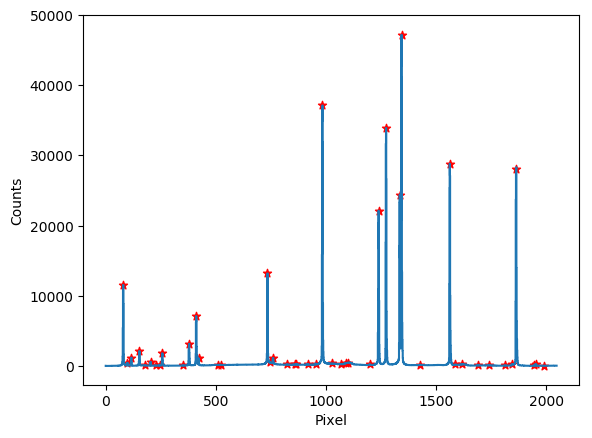

In [22]:
pypeIt.caliBrate.waveCalib.show('spec', slit=10)

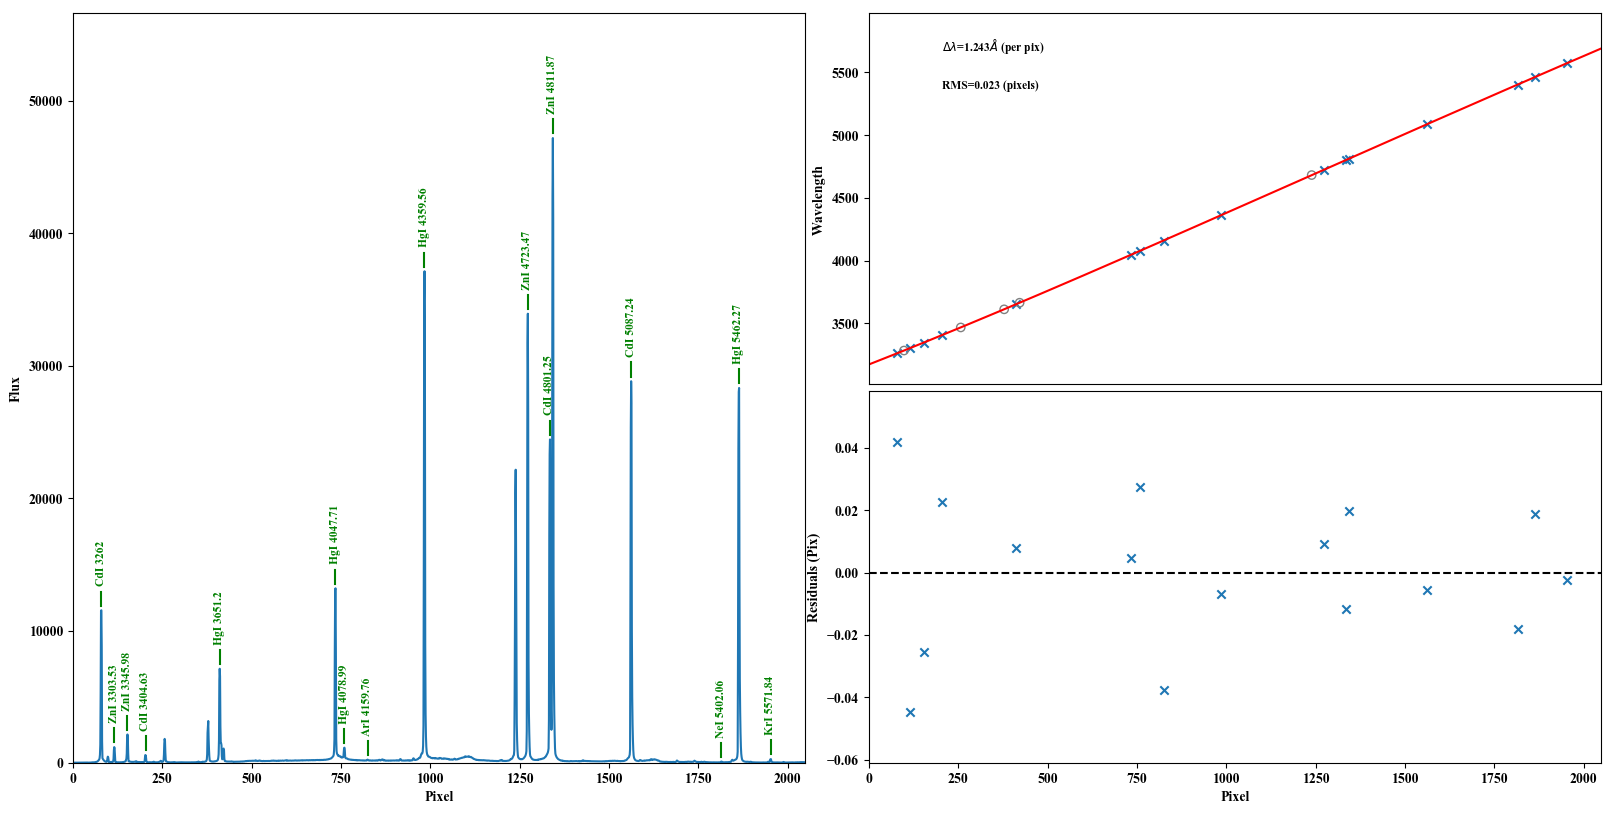

In [23]:
pypeIt.caliBrate.waveCalib.show('fit', slit=10)

### Tilts
    See PNGs for QA

In [24]:
_ = pypeIt.caliBrate.get_tilts()  # ~3 min

[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 0
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 1
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 2
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 3
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 4
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 5
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 6
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 7
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spectrum at the centre of slit 8
[INFO]    :: arc.py 499 get_censpec() - Extracting an approximate arc spe

[INFO]    :: tracewave.py 586 fit_tilts() - Rejected 0/109568 pixels in final inversion tilts image fit
[INFO]    :: wavetilts.py 304 run() - Computing tilts for slit 5/13
[INFO]    :: tracewave.py 80 tilts_find_lines() - Modelling arc line tilts with 22 arc lines
[INFO]    :: tracewave.py 346 trace_tilts_work() - Number of usable arc lines for tilts: 21/22
[INFO]    :: tracewave.py 452 trace_tilts() - PCA modeling 21 good tilts
[INFO]    :: extract.py 1903 pca_trace() - Truncated PCA with npca=1 components contains 71.596% of the total variance.
[INFO]    :: tracewave.py 346 trace_tilts_work() - Number of usable arc lines for tilts: 20/22
[INFO]    :: tracewave.py 518 fit_tilts() - Fitting tilts with a low order, 2D legendre2d
[INFO]    :: tracewave.py 546 fit_tilts() - Residuals: 2D Legendre Fit
[INFO]    :: tracewave.py 547 fit_tilts() - RMS (pixels): 0.044538722590976645
[INFO]    :: tracewave.py 548 fit_tilts() - RMS/FWHM: 0.011134680647744161
[INFO]    :: tracewave.py 550 fit_til

[INFO]    :: tracewave.py 346 trace_tilts_work() - Number of usable arc lines for tilts: 20/20
[INFO]    :: tracewave.py 452 trace_tilts() - PCA modeling 20 good tilts
[INFO]    :: extract.py 1903 pca_trace() - Truncated PCA with npca=1 components contains 88.275% of the total variance.
[INFO]    :: tracewave.py 346 trace_tilts_work() - Number of usable arc lines for tilts: 20/20
[INFO]    :: tracewave.py 518 fit_tilts() - Fitting tilts with a low order, 2D legendre2d
[INFO]    :: tracewave.py 546 fit_tilts() - Residuals: 2D Legendre Fit
[INFO]    :: tracewave.py 547 fit_tilts() - RMS (pixels): 0.04099551086720888
[INFO]    :: tracewave.py 548 fit_tilts() - RMS/FWHM: 0.01024887771680222
[INFO]    :: tracewave.py 550 fit_tilts() - Inverting the fit to generate the tilts image
[INFO]    :: tracewave.py 586 fit_tilts() - Rejected 0/97138 pixels in final inversion tilts image fit
[INFO]    :: wavetilts.py 304 run() - Computing tilts for slit 12/13
[INFO]    :: tracewave.py 80 tilts_find_li

### Flats

In [27]:
_ = pypeIt.caliBrate.get_flats()

[INFO]    :: calibrations.py 445 get_flats() - Found user-defined file: /home/xavier/local/Python/PypeIt-development-suite/CALIBS/PYPEIT_LRISb_pixflat_B600_2x2_17sep2009.fits.gz
[INFO]    :: masterframe.py 111 load_master() - Loading a pre-existing master calibration frame of type: pixelflat from filename: /home/xavier/local/Python/PypeIt-development-suite/CALIBS/PYPEIT_LRISb_pixflat_B600_2x2_17sep2009.fits.gz
[WARNING] :: masterframe.py 108 load_master() - No Master frame found of type pixelflat: ./TMP/MF_keck_lris_blue/MasterIllumFlat_A_1_01.fits
[WARNING] :: flatfield.py 184 load_master_illumflat() - No Master frame found of type illumflat: ./TMP/MF_keck_lris_blue/MasterIllumFlat_A_1_01.fits
[WARNING] :: calibrations.py 498 get_flats() - You are not illumination flat fielding your data!


### Wavelength Image

In [28]:
_ = pypeIt.caliBrate.get_wave()

[INFO]    :: masterframe.py 151 save_master() - Saving master wave frame as:
             ./TMP/MF_keck_lris_blue/MasterWave_A_1_01.fits
[INFO]    :: masterframe.py 165 save_master() - Writing header information
[WARNING] :: masterframe.py 176 save_master() - Overwriting file:
             ./TMP/MF_keck_lris_blue/MasterWave_A_1_01.fits
[INFO]    :: masterframe.py 181 save_master() - Master wave frame saved successfully:
             ./TMP/MF_keck_lris_blue/MasterWave_A_1_01.fits


In [29]:
pypeIt.caliBrate.waveImage.show()

## Extraction

### The following ~8 steps could all be done with one call to pypeIt.extract_one(frames, det)

### Setup

In [30]:
frames = [frame]

In [31]:
pypeIt.prep_extract(frames, det)
pypeIt.sciI

<ScienceImage: nimg=1>

### Process Images

In [32]:
pypeIt.sciimg, pypeIt.sciivar, pypeIt.rn2img, pypeIt.mask, pypeIt.crmask  = pypeIt.sciI.proc(
    pypeIt.caliBrate.msbias, pypeIt.caliBrate.mspixflatnrm, 
    pypeIt.caliBrate.msbpm, illum_flat=pypeIt.caliBrate.msillumflat, show=True)

[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2083.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2083.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2083.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2083.fits.gz
[INFO]    :: keck_lris.py 754 read_lris() - Reading LRIS file: /home/xavier/local/Python/PypeIt-development-suite/RAW_DATA/Keck_LRIS_blue/multi_600_4000_d560/b170320_2083.fits.gz
[INFO]    :: processimages.py 412 bias_subtract() - Bias subtracting your image(s)
[INFO]    :: processim

### Find objects (Round 1)

In [33]:
# Object finding, first pass on frame without sky subtraction (mainly to find bright ones and mask them)
maskslits = pypeIt.caliBrate.maskslits.copy()
_, _, skymask_init = pypeIt.find_objects(pypeIt.sciI.sciimg, snr_trim=False, maskslits=maskslits, show=True)

[INFO]    :: scienceimage.py 269 find_objects() - Finding objects on slit # 0
[WARNING] :: extract.py 1528 objfind() - Discarding 1 at spatial pixels spat = [-1.] which land within trim_edg = (left, right) = (5, 5) pixels from the slit boundary for this nsamp = 81.00 wide slit
[WARNING] :: extract.py 1529 objfind() - You must decrease from the current value of trim_edg in order to keep them
[WARNING] :: extract.py 1530 objfind() - Such edge objects are often spurious
[WARNING] :: extract.py 1539 objfind() - Requested nperslit = 10 most significant objects but only npeak = 6 were found. Returning all the objects found.
[INFO]    :: extract.py 1555 objfind() - Used SIGNIFICANCE threshold: sig_thresh = 10.0 * sigma =  0.40
[INFO]    :: extract.py 1561 objfind() - Object finding threshold of:  3.98
[INFO]    :: extract.py 1670 objfind() - No objects found
[INFO]    :: scienceimage.py 269 find_objects() - Finding objects on slit # 1
[WARNING] :: extract.py 1528 objfind() - Discarding 1 at s

[INFO]    :: scienceimage.py 269 find_objects() - Finding objects on slit # 12
[WARNING] :: extract.py 1539 objfind() - Requested nperslit = 10 most significant objects but only npeak = 3 were found. Returning all the objects found.
[INFO]    :: extract.py 1555 objfind() - Used SIGNIFICANCE threshold: sig_thresh = 10.0 * sigma =  0.01
[INFO]    :: extract.py 1561 objfind() - Object finding threshold of:  0.10
[INFO]    :: extract.py 1675 objfind() - Fitting the object traces
[INFO]    :: scienceimage.py 269 find_objects() - Finding objects on slit # 13
[WARNING] :: extract.py 1539 objfind() - Requested nperslit = 10 most significant objects but only npeak = 6 were found. Returning all the objects found.
[INFO]    :: extract.py 1555 objfind() - Used SIGNIFICANCE threshold: sig_thresh = 10.0 * sigma =  0.03
[INFO]    :: extract.py 1561 objfind() - Object finding threshold of:  0.29
[INFO]    :: extract.py 1675 objfind() - Fitting the object traces


### Global sky sub

In [34]:
initial_sky = pypeIt.sciI.global_skysub(pypeIt.caliBrate.tilts_dict['tilts'], skymask=skymask_init,
                                     maskslits=maskslits, show=True, verbose=False)

[INFO]    :: scienceimage.py 377 global_skysub() - Global sky subtraction for slit: 0
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=152203 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.002    13285        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.002, rejected =   13285, relative_factor =   1.00
[INFO]    :: utils.py 565 bspline_profile() - ************************************************************************************************

[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.007    19004        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.007, rejected =   19004, relative_factor =   1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  5 iterations: reduced_chi =    1.436, rejected =    6252, relative_factor =   1.00
[INFO]    :: scienceimage.py 377 global_skysub() - Global sky subtraction for slit: 7
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=47014 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. f

[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  4 iterations: reduced_chi =    1.229, rejected =    5583, relative_factor =   1.00
[INFO]    :: scienceimage.py 377 global_skysub() - Global sky subtraction for slit: 13
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=94512 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.005    11724        1.00
[INFO]    :: utils.py 565 bspline_profile() - ************************************************************************************************

### Second pass of object finding

In [35]:
pypeIt.sobjs_obj, _, pypeIt.skymask = pypeIt.find_objects(pypeIt.sciimg - initial_sky, snr_trim=True,
                                  maskslits=maskslits,show=True)

[INFO]    :: scienceimage.py 269 find_objects() - Finding objects on slit # 0
[WARNING] :: extract.py 1539 objfind() - Requested nperslit = 10 most significant objects but only npeak = 6 were found. Returning all the objects found.
[INFO]    :: extract.py 1555 objfind() - Used SIGNIFICANCE threshold: sig_thresh = 10.0 * sigma =  0.13
[INFO]    :: extract.py 1561 objfind() - Object finding threshold of:  1.32
[INFO]    :: extract.py 1675 objfind() - Fitting the object traces
[INFO]    :: scienceimage.py 269 find_objects() - Finding objects on slit # 1
[WARNING] :: extract.py 1539 objfind() - Requested nperslit = 10 most significant objects but only npeak = 8 were found. Returning all the objects found.
[INFO]    :: extract.py 1555 objfind() - Used SIGNIFICANCE threshold: sig_thresh = 10.0 * sigma =  0.10
[INFO]    :: extract.py 1561 objfind() - Object finding threshold of:  0.95
[INFO]    :: extract.py 1670 objfind() - No objects found
[INFO]    :: scienceimage.py 269 find_objects() - F

[INFO]    :: scienceimage.py 269 find_objects() - Finding objects on slit # 13
[WARNING] :: extract.py 1528 objfind() - Discarding 1 at spatial pixels spat = [51.1796749] which land within trim_edg = (left, right) = (5, 5) pixels from the slit boundary for this nsamp = 56.00 wide slit
[WARNING] :: extract.py 1529 objfind() - You must decrease from the current value of trim_edg in order to keep them
[WARNING] :: extract.py 1530 objfind() - Such edge objects are often spurious
[WARNING] :: extract.py 1539 objfind() - Requested nperslit = 10 most significant objects but only npeak = 5 were found. Returning all the objects found.
[INFO]    :: extract.py 1555 objfind() - Used SIGNIFICANCE threshold: sig_thresh = 10.0 * sigma =  0.09
[INFO]    :: extract.py 1561 objfind() - Object finding threshold of:  0.95
[INFO]    :: extract.py 1670 objfind() - No objects found


### Second round of global subtraction

In [36]:
pypeIt.global_sky = pypeIt.sciI.global_skysub(pypeIt.caliBrate.tilts_dict['tilts'], verbose=False,
                                                     skymask=pypeIt.skymask, maskslits=maskslits, show=True)

[INFO]    :: scienceimage.py 377 global_skysub() - Global sky subtraction for slit: 0
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=141859 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.002    23629        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.002, rejected =   23629, relative_factor =   1.00
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  2 profile basis functions, nin=161113 good pixels
[INFO]    :: utils.py 470 bsp

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.016     2034        1.00
[INFO]    :: utils.py 551 bspline_profile() -                                 2   0.980     2045        1.00
[INFO]    :: utils.py 551 bspline_profile() -                                 3   0.979     2045        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    0.979, rejected =    2045, relative_factor =   1.00
[INFO]    :: scienceimage.py 377 global_skysub() - Global sky subtraction for slit: 4
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=52139 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_pro

[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.008    22426        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.008, rejected =   22426, relative_factor =   1.00
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=65720 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.349     5338        1.00
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.253     5370        1.00
[INFO]    :

[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.227      651        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    1.227, rejected =     651, relative_factor =   1.00
[INFO]    :: scienceimage.py 377 global_skysub() - Global sky subtraction for slit: 11
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=52907 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.007    21977        1.00
[INFO]    :: utils.py 565 bspline

[WORK IN ]::
[PROGRESS]:: procimg.py 751 lacosmic() - The following algorithm would be better on the rectified, tilts-corrected image
[INFO]    :: procimg.py 763 lacosmic() - Growing cosmic ray mask by 1 pixel


### Extract + local sky sub (~5min)

In [37]:
pypeIt.skymodel, pypeIt.objmodel, pypeIt.ivarmodel, pypeIt.outmask, pypeIt.sobjs = \
                pypeIt.sciI.local_skysub_extract(pypeIt.sobjs_obj, pypeIt.caliBrate.mswave, 
                                                 model_noise=True,
                                                 maskslits=maskslits, show_profile=False, show=True,
                                                verbose=False)

[INFO]    :: scienceimage.py 488 local_skysub_extract() - Local sky subtraction and extraction for slit: 0
[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  1.40
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   4.12 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 on slit # 0, iter # 1:, FWHM=  4.12, S/N=   1.400
[INFO]    :: skysub.py 377 optimal_bkpts() - Sampling of wavelengths is nearly continuous.
[INFO]    :: skysub.py 378 optimal_bkpts() - Using uniform bkpt spacing: bsp=0.600
[INFO]    :: skysub.py 232 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  3 profile basis functions, nin=136657 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected 

[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.970       59        1.00
[INFO]    :: utils.py 551 bspline_profile() -                                 2   0.963       59        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  2 iterations: reduced_chi =    0.963, rejected =      59, relative_factor =   1.00
[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  1.30
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   4.12 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 on slit # 0, iter # 4:, FWHM=  4.12, S/N=   1.298
[INFO]    :: skysub.py 377 optimal_bkpts() - Sampling of wav

[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.983       30        1.00
[INFO]    :: utils.py 551 bspline_profile() -                                 2   0.978       30        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  2 iterations: reduced_chi =    0.978, rejected =      30, relative_factor =   1.00
[INFO]    :: skysub.py 270 skyoptimal() - 2nd round....
[INFO]    :: skysub.py 271 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  3 profile basis functions, nin=113664 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  

[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  0.00
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   3.53 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 on slit # 4, iter # 1:, FWHM=  3.53, S/N=   0.000
[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  0.75
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   4.12 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 2 on slit # 4, iter # 1:, FWHM=  4.12, S/N=   0.749
[INFO]    :: skysub.py 232 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  4 p

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.317       19        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.307       23        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.305       23        1.09
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    1.305, rejected =      23, relative_factor =   1.09
[INFO]    :: skysub.py 270 skyoptimal() - 2nd round....
[INFO]    :: skysub.py 271 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  4 profile basis functions, nin=74455 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ************************

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.288       23        1.10
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.277       27        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.275       27        1.09
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    1.275, rejected =      27, relative_factor =   1.09
[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  1.27
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   5.94 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 o

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.319        2        1.11
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.318        2        1.11
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  2 iterations: reduced_chi =    1.318, rejected =       2, relative_factor =   1.11
[INFO]    :: scienceimage.py 488 local_skysub_extract() - Local sky subtraction and extraction for slit: 6
[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  3.42
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   2.67 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 on 

[INFO]    :: utils.py 568 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.423, rejected =       0, relative_factor =   1.00
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  2 profile basis functions, nin=4989 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.423        0        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.423, rejected =       0, relative_factor =   1.00
[INFO]    :: extract.py 966 fit_profile() - Iteration#   2
[INFO]    :: extract.py 9

[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.594        0        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.594, rejected =       0, relative_factor =   1.00
[INFO]    :: extract.py 966 fit_profile() - Iteration#   1
[INFO]    :: extract.py 967 fit_profile() - Median abs value of trace correction =    0.011
[INFO]    :: extract.py 968 fit_profile() - Median abs value of width correction =    0.038
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  1 profile basis functions, nin=7077

[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.223       27        1.06
[INFO]    :: utils.py 551 bspline_profile() -                                 4   1.223       27        1.06
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  4 iterations: reduced_chi =    1.223, rejected =      27, relative_factor =   1.06
[INFO]    :: skysub.py 270 skyoptimal() - 2nd round....
[INFO]    :: skysub.py 271 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  3 profile basis functions, nin=58047 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  -

[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  2 profile basis functions, nin=6928 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   0.641        0        1.00
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  1 iterations: reduced_chi =    0.641, rejected =       0, relative_factor =   1.00
[INFO]    :: extract.py 966 fit_profile() - Iteration#   3
[INFO]    :: extract.py 967 fit_profile() - Median abs value of trace correction =    0.006
[INFO]    :: extract.py 968 fit_profile() - Median abs value of width correctio

[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  0.80
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   4.31 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 on slit # 7, iter # 2:, FWHM=  4.31, S/N=   0.802
[INFO]    :: skysub.py 232 skyoptimal() - Iter     Chi^2     Rejected Pts
[INFO]    :: utils.py 469 bspline_profile() - Fitting npoly =  3 profile basis functions, nin=57490 good pixels
[INFO]    :: utils.py 470 bspline_profile() - ******************************  Iter  Chi^2  # rejected  Rel. fact   ******************************
[INFO]    :: utils.py 471 bspline_profile() -                               ----  -----  ----------  --------- 
[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.331       10        1.10
[INFO]    :: util

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.303       15        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.296       15        1.09
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  2 iterations: reduced_chi =    1.296, rejected =      15, relative_factor =   1.09
[INFO]    :: scienceimage.py 488 local_skysub_extract() - Local sky subtraction and extraction for slit: 8
[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  0.47
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   3.87 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 on 

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.294        9        1.10
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.291        9        1.10
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  2 iterations: reduced_chi =    1.291, rejected =       9, relative_factor =   1.10
[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  0.43
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   3.87 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 on slit # 8, iter # 4:, FWHM=  3.87, S/N=   0.432
[INFO]    :: skysub.py 232 skyoptimal() - Iter     Chi^2    

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.378        7        1.18
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.377        7        1.18
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  2 iterations: reduced_chi =    1.377, rejected =       7, relative_factor =   1.18
[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  0.66
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   3.68 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 on slit # 9, iter # 3:, FWHM=  3.68, S/N=   0.661
[INFO]    :: skysub.py 232 skyoptimal() - Iter     Chi^2    

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.273       55        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.255       60        1.08
[INFO]    :: utils.py 551 bspline_profile() -                                 3   1.253       60        1.08
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  3 iterations: reduced_chi =    1.253, rejected =      60, relative_factor =   1.08
[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  1.44
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   3.51 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 o

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.274        8        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.271        8        1.09
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  2 iterations: reduced_chi =    1.271, rejected =       8, relative_factor =   1.09
[INFO]    :: scienceimage.py 488 local_skysub_extract() - Local sky subtraction and extraction for slit: 12
[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  0.57
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   3.11 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 on

[INFO]    :: utils.py 551 bspline_profile() -                                 1   1.280       12        1.09
[INFO]    :: utils.py 551 bspline_profile() -                                 2   1.276       12        1.09
[INFO]    :: utils.py 565 bspline_profile() - ***************************************************************************************************
[INFO]    :: utils.py 568 bspline_profile() - Final fit after  2 iterations: reduced_chi =    1.276, rejected =      12, relative_factor =   1.09
[INFO]    :: extract.py 753 fit_profile() - sqrt(med(S/N)^2) =  0.44
[INFO]    :: extract.py 801 fit_profile() - Gaussian vs b-spline of width   3.11 pixels
[INFO]    :: extract.py 808 fit_profile() - Too few good pixels or S/N <  4.0 or gauss flag set
[INFO]    :: extract.py 809 fit_profile() - Returning Gaussian profile
[INFO]    :: extract.py 595 return_gaussian() - obj # 1 on slit # 12, iter # 4:, FWHM=  3.11, S/N=   0.440
[INFO]    :: skysub.py 232 skyoptimal() - Iter     Chi^2   

## 1D Polishing

### Flexure -- QA is in PNG files

In [43]:
pypeIt.flexure_correct(pypeIt.sobjs, maskslits)

[WORK IN ]::
[PROGRESS]:: wave.py 261 flexure_obj() - Consider doing 2 passes in flexure as in LowRedux
[INFO]    :: wave.py 272 flexure_obj() - Working on flexure in slit (if an object was detected): 0
[INFO]    :: wave.py 286 flexure_obj() - Working on flexure for object # 1in slit # 0
[WARNING] :: wave.py 48 flex_shift() - If we use Paranal, cut down on wavelength early on
[INFO]    :: wave.py 80 flex_shift() - Resolution of Archive=437.2285069449724 and Observation=1175.977095401752
[WARNING] :: wave.py 94 flex_shift() - Prefer archival sky spectrum to have higher resolution
[WARNING] :: wave.py 96 flex_shift() - New Sky has higher resolution than Archive.  Not smoothing
[WORK IN ]::
[PROGRESS]:: wave.py 147 flex_shift() - Need to mask bad pixels
[WORK IN ]::
[PROGRESS]:: wave.py 150 flex_shift() - Consider taking median first [5 pixel]
[WORK IN ]::
[PROGRESS]:: wave.py 163 flex_shift() - Consider taking median first [5 pixel]
[INFO]    :: wave.py 182 flex_shift() - Flexure correct

[WORK IN ]::
[PROGRESS]:: wave.py 163 flex_shift() - Consider taking median first [5 pixel]
[INFO]    :: wave.py 182 flex_shift() - Flexure correction of -0.00936332 pixels
[INFO]    :: wave.py 309 flexure_obj() - Applying flexure correction to boxcar extraction for object:
             <Table length=1>
 shape [2]             slit_spat_pos [2]            ... trace_spec [2048]
   int64                    float64                 ...       int64      
------------ -------------------------------------- ... -----------------
2048 .. 1024 560.9702138714492 .. 586.8503143116832 ...         0 .. 2047
[INFO]    :: wave.py 309 flexure_obj() - Applying flexure correction to optimal extraction for object:
             <Table length=1>
 shape [2]             slit_spat_pos [2]            ... trace_spec [2048]
   int64                    float64                 ...       int64      
------------ -------------------------------------- ... -----------------
2048 .. 1024 560.9702138714492 .. 586.850314

[WORK IN ]::
[PROGRESS]:: wave.py 163 flex_shift() - Consider taking median first [5 pixel]
[INFO]    :: wave.py 182 flex_shift() - Flexure correction of -0.0147861 pixels
[INFO]    :: wave.py 309 flexure_obj() - Applying flexure correction to boxcar extraction for object:
             <Table length=1>
 shape [2]             slit_spat_pos [2]           ... trace_spec [2048]
   int64                    float64                ...       int64      
------------ ------------------------------------- ... -----------------
2048 .. 1024 721.6983700096607 .. 829.912750903517 ...         0 .. 2047
[INFO]    :: wave.py 309 flexure_obj() - Applying flexure correction to optimal extraction for object:
             <Table length=1>
 shape [2]             slit_spat_pos [2]           ... trace_spec [2048]
   int64                    float64                ...       int64      
------------ ------------------------------------- ... -----------------
2048 .. 1024 721.6983700096607 .. 829.912750903517 .

### Helio-centric

In [44]:
vel_corr = pypeIt.helio_correct(pypeIt.sobjs, maskslits, frames[0], pypeIt.obstime)

[INFO]    :: pypeit.py 381 helio_correct() - Performing a heliocentric correction
[INFO]    :: wave.py 465 geomotion_correct() - Applying heliocentric correction to boxcar extraction for object:
             <Table length=1>
 shape [2]              slit_spat_pos [2]             ... trace_spec [2048]
   int64                     float64                  ...       int64      
------------ ---------------------------------------- ... -----------------
2048 .. 1024 389.27055083960295 .. 452.67658963799477 ...         0 .. 2047
[INFO]    :: wave.py 465 geomotion_correct() - Applying heliocentric correction to optimal extraction for object:
             <Table length=1>
 shape [2]              slit_spat_pos [2]             ... trace_spec [2048]
   int64                     float64                  ...       int64      
------------ ---------------------------------------- ... -----------------
2048 .. 1024 389.27055083960295 .. 452.67658963799477 ...         0 .. 2047
[INFO]    :: wave.py 46

----

## Show a few spectra?!

In [48]:
pypeIt.sobjs

<Table length=11>
 shape [2]              slit_spat_pos [2]             ... trace_spec [2048]
   int64                     float64                  ...       int64      
------------ ---------------------------------------- ... -----------------
2048 .. 1024   228.34981697797775 .. 309.151738576591 ...         0 .. 2047
2048 .. 1024 389.27055083960295 .. 452.67658963799477 ...         0 .. 2047
2048 .. 1024  510.87580674886703 .. 553.1841875351965 ...         0 .. 2047
2048 .. 1024  510.87580674886703 .. 553.1841875351965 ...         0 .. 2047
2048 .. 1024   560.9702138714492 .. 586.8503143116832 ...         0 .. 2047
2048 .. 1024   588.9384318590164 .. 625.3445659186691 ...         0 .. 2047
2048 .. 1024    632.0776411518455 .. 666.663665316999 ...         0 .. 2047
2048 .. 1024    671.663665316999 .. 713.1382733844221 ...         0 .. 2047
2048 .. 1024    721.6983700096607 .. 829.912750903517 ...         0 .. 2047
2048 .. 1024   878.2195314019918 .. 915.0460333861411 ...         0 ..

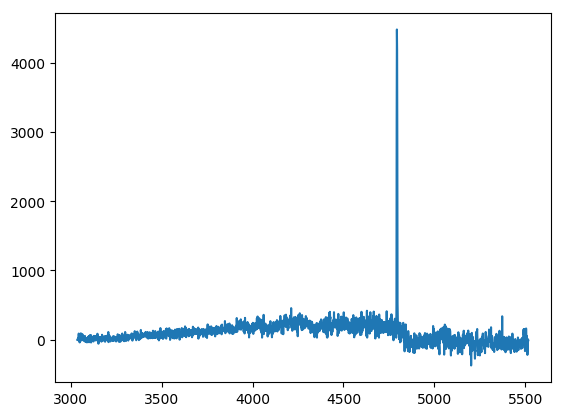

In [52]:
plt.clf()
ax = plt.gca()
ax.plot(pypeIt.sobjs[5].boxcar['WAVE'], pypeIt.sobjs[5].boxcar['COUNTS'])
plt.show()